Assignment no 6  - Rainfall-prediction 

1: Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# For clear visualization style
plt.style.use('ggplot')

print("Libraries imported successfully.")

Libraries imported successfully.


2: Load the Dataset

In [2]:
# Load the dataset
# Note: Ensure 'austin_weather.csv' is in the same directory
try:
    data = pd.read_csv('austin_weather.csv')
    print("Dataset loaded successfully.")
    print(f"Shape of dataset: {data.shape}")
except FileNotFoundError:
    print("Error: 'austin_weather.csv' file not found. Please upload it to the notebook folder.")
    
# Display the first few rows to inspect the data
data.head()

Dataset loaded successfully.
Shape of dataset: (1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,12/21/2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,12/22/2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,12/23/2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,12/24/2013,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,12/25/2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


3: Data Cleaning (Crucial Step)

In [3]:
# === PREPROCESSING & CLEANING ===

# The dataset contains 'T' (Trace rain) and '-' (Missing/Zero).
# We must replace them to perform mathematical operations.

# Replace 'T' with a very small number (e.g., 0.001) or 0
data = data.replace('T', 0.0)

# Replace '-' with NaN (Not a Number) so we can drop or fill them
data = data.replace('-', np.nan)

# Save the column names we are interested in
# Based on assignment: Precip (Target), Temp, Humidity, Wind (Features)
cols_to_use = ['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH', 'PrecipitationSumInches']

# Convert these columns to numeric (floats)
# This forces any remaining text to become numbers
for col in cols_to_use:
    data[col] = pd.to_numeric(data[col])

# Drop any rows that still have missing values (NaN)
data_clean = data.dropna(subset=cols_to_use)

print("Data cleaning complete.")
print(f"Rows remaining after cleaning: {len(data_clean)}")

Data cleaning complete.
Rows remaining after cleaning: 1316


4: Define Features (X) and Target (Y)

In [4]:
# Define input features (X)
# using Average Temperature, Average Humidity, and Average Wind Speed
X = data_clean[['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']]

# Define target variable (Y)
# We want to predict Precipitation
Y = data_clean['PrecipitationSumInches']

# Reshape Y to be a 2D array (required by some sklearn functions)
Y = Y.values.reshape(-1, 1)

print("Features (X) and Target (Y) prepared.")
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

Features (X) and Target (Y) prepared.
X shape: (1316, 3)
Y shape: (1316, 1)


5: Train the Linear Regression Model

In [5]:
# Split data into training and testing sets (Optional but recommended for validation)
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Linear Regression Model trained successfully.")
print(f"Model Intercept: {model.intercept_[0]:.4f}")
print("Model Coefficients:")
print(f"  TempAvgF: {model.coef_[0][0]:.4f}")
print(f"  HumidityAvgPercent: {model.coef_[0][1]:.4f}")
print(f"  WindAvgMPH: {model.coef_[0][2]:.4f}")

Linear Regression Model trained successfully.
Model Intercept: -0.6848
Model Coefficients:
  TempAvgF: -0.0014
  HumidityAvgPercent: 0.0125
  WindAvgMPH: 0.0143


6: Visualizing Trends

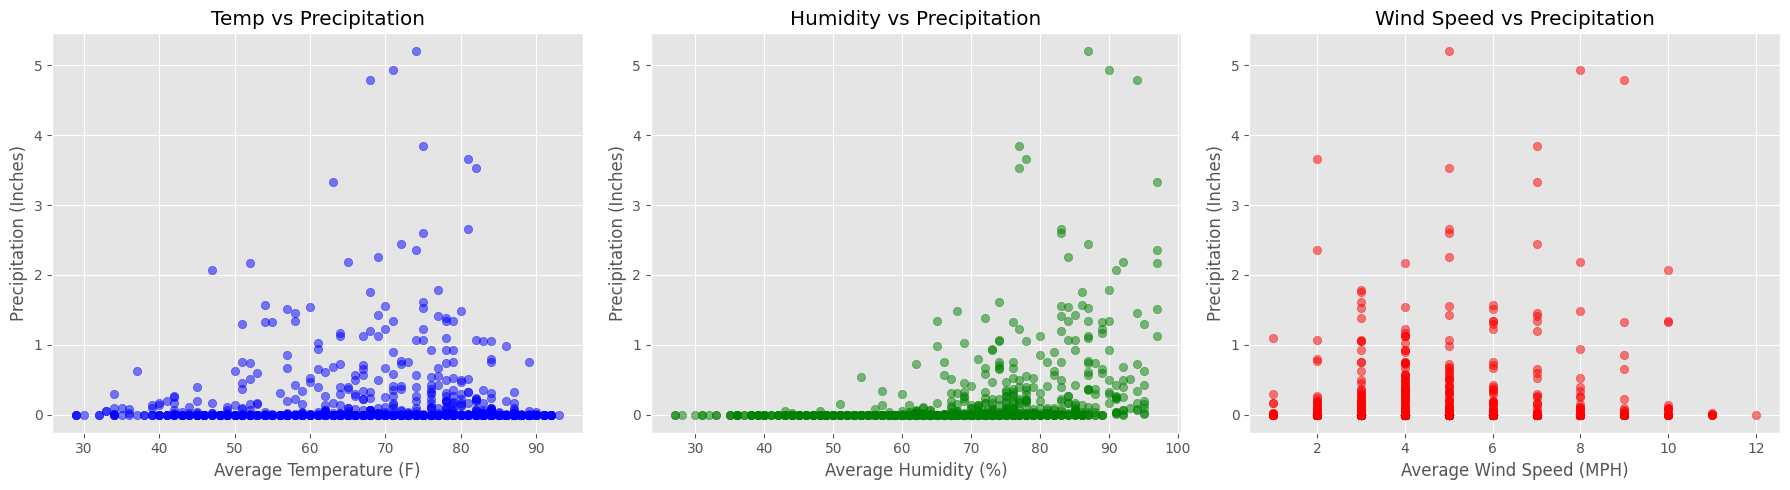

In [6]:
# === VISUALIZATION ===

# Create a figure with subplots to compare different features
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Temperature vs Precipitation
ax[0].scatter(X['TempAvgF'], Y, color='blue', alpha=0.5)
ax[0].set_xlabel('Average Temperature (F)')
ax[0].set_ylabel('Precipitation (Inches)')
ax[0].set_title('Temp vs Precipitation')

# Plot 2: Humidity vs Precipitation
ax[1].scatter(X['HumidityAvgPercent'], Y, color='green', alpha=0.5)
ax[1].set_xlabel('Average Humidity (%)')
ax[1].set_ylabel('Precipitation (Inches)')
ax[1].set_title('Humidity vs Precipitation')

# Plot 3: Wind Speed vs Precipitation
ax[2].scatter(X['WindAvgMPH'], Y, color='red', alpha=0.5)
ax[2].set_xlabel('Average Wind Speed (MPH)')
ax[2].set_ylabel('Precipitation (Inches)')
ax[2].set_title('Wind Speed vs Precipitation')

plt.tight_layout()
plt.show()

7: Testing Predictions

Mean Absolute Error of the model: 0.1831 inches


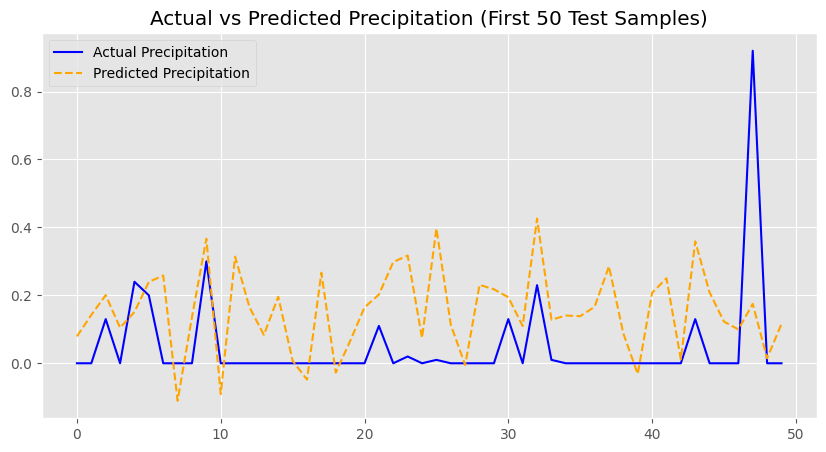

In [7]:
# Let's verify with some test data predictions
y_pred = model.predict(X_test)

# Calculate error (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of the model: {mae:.4f} inches")

# Visualize Actual vs Predicted for a small sample
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label='Actual Precipitation', color='blue')
plt.plot(y_pred[:50], label='Predicted Precipitation', color='orange', linestyle='--')
plt.title("Actual vs Predicted Precipitation (First 50 Test Samples)")
plt.legend()
plt.show()